In [9]:
!pip install wordcloud


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string   

from scipy import stats
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/owenkutzscher/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/owenkutzscher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Read the CSV file
df_extra_params = pd.read_csv("../data/Reviews.csv")

# Lets clean up the data
# We will be working with "Score" and "Tet"
# which is the review's score 1-5 and the text of the review

df_unbalanced = df_extra_params[["Score", "Text"]]
df_unbalanced.head()




,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


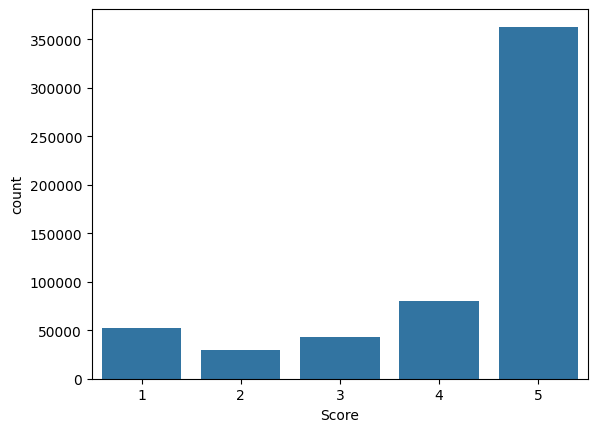

In [11]:
# Plot histogram
sns.countplot(data=df_unbalanced, x="Score")
plt.show()


In [12]:
# Make all review scores have the same number of reviews


# Determine minimum number of reviews for any score
min_reviews = df_unbalanced['Score'].value_counts().min()

def create_subset(data, fraction):
    subset_data = data.sample(frac=fraction)
    return subset_data

# Split the data into five groups with an equal number of reviews in each group
df_grouped = df_unbalanced.groupby('Score', group_keys=False).apply(lambda x: x.sample(min_reviews))

# Apply the fraction parameter to each group
# My computer occasionally freaks out when I make the fraction 1, so 0.9 will do for now...
fraction_to_keep = 0.9
# You adjust this fraction as needed, the data is decently uniform,
# don't be affraid to make it small ex: 0.1
df = df_grouped.groupby('Score').apply(lambda x: create_subset(x, fraction_to_keep)).reset_index(drop=True)

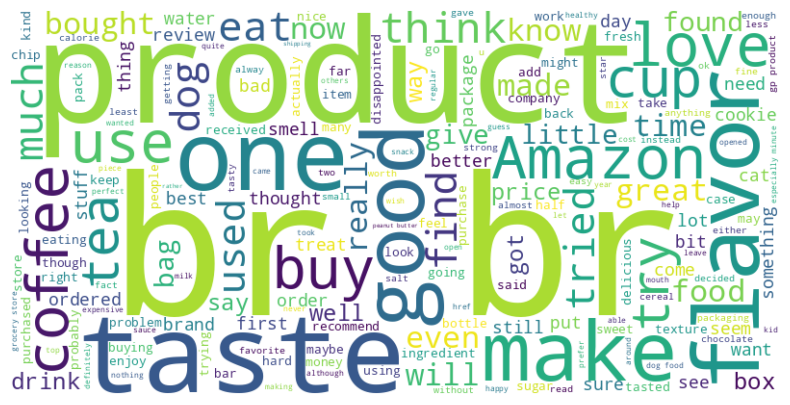

In [13]:
# Generate and display word cloud
text_combined = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# Clean up the data




# Clean up the data

# Remove NaN values and lowercase the text
df = df.dropna(subset=['Text']).copy()
df['Text'] = df['Text'].str.lower()

# Remove HTML text
df['Text'] = df['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())



/tmp/ipykernel_17766/3751487367.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['Text'] = df['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


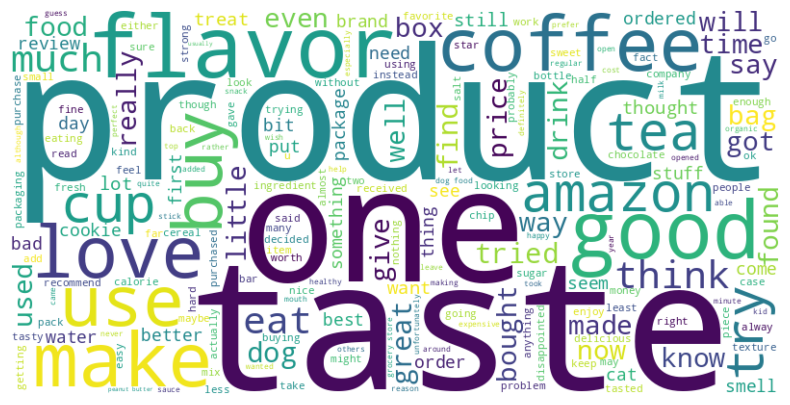

In [15]:
# Generate and display word cloud
text_combined = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:

# Extra data cleaning (may make models perform worse, or better...)

# Lemmatization (Reduce words to their base)
lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Remove Punctuation
df['Text'] = df['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Drop noisy text, such as special characters, numbers, or other non-text elements.
df['Text'] = df['Text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)



# # If you try to print the word cloud after uncommenting below it will crash the kernal!
# # Remove Common Stop Words (“a,” “the,” “is,” “are,” etc.)
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))






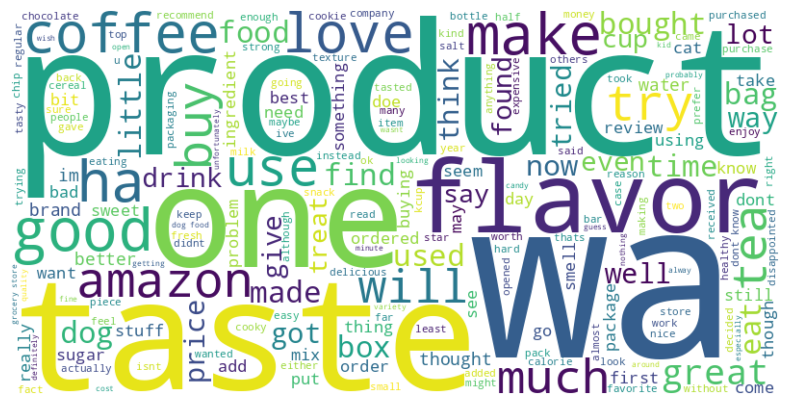

In [17]:
# Generate and display word cloud
text_combined = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()